# Exercise RL2.1: Inhibitory conditioning

You learned about inhibitory conditioning in the lecture and were asked to simulate it with the Rescorla-Wagner rule in exercise RL1.1. In inhibitory conditioning the second stimulus $s_2$ becomes a conditioned inhibitor prediciting a negative reward. Please make a suggestion how such an outcome could be experimentally demonstrated.

(Remark: Feel free to sit together with other students to discuss this question).

Idea:
- Training phase
- Test phase: pairing $s_2$ with positive reward should lead to overall 0 reward and therefore "neutral" behavior 
- Another training phase: reconiditioning slower for $s_2$ than neutral stimulus?

# Exercise RL2.2: Temporal Difference Learning for classical conditioning

In this exercise you will reproduce and investigate the results from the lectures which simulate classical conditioning with temporal difference learning. 

The code in the cell below implements the temporal difference learning algorithm for classical conditioning.

In [1]:
from matplotlib import pylab as plt
import numpy as np
import pdb

# 
# Function temporal_difference_update
#
# Computes the value function, the temporal difference error and the weights for a classical conditing task  
# using temporal difference learning
#
# Input:
# u: stimulus variable indicating when the stimulus was present; two-dimensional array with first index representing the trial number and the second 
# index the time step within a trial
#
# r: reward variable indicating when a reward was delivered; two-dimensional array with first index representing the trial number and the second 
# index the time step within a trial
#
# epsilon: the learning rate, default value: 0.5
#
# Return:
# vs: value function; two-dimensional array with first index representing the trial number and the second 
# index the time step within a trial
#
# tds: temporal difference error; two-dimensional array with first index representing the trial number and the second 
# index the time step within a trial
#
# w: weight function; two-dimensional array with first index representing the trial number and the second 
# index the delay tau between stimulus and value
#

def temporal_difference_update(u, r, epsilon=0.5):
     
    ntrials=u.shape[0]
    T=u.shape[1]
    
    vs=np.zeros([ntrials, T]) # values as a function of trial and time step
    ws=np.zeros([ntrials, T]) # weights as a function of trial and tau  
    tds=np.zeros([ntrials, T]) # temporal difference error as a function of trial and time step

    # loop over trials 
    for idtrial in range (1,ntrials):
        
        # copy values and weights from previous trial for calculations in current trial 
        v=vs[idtrial-1,:] 
        w=ws[idtrial-1,:]
        td=np.zeros(T)
        
        # loop over time steps of curren trial
        for idx in range(1,T-1):
            # compute value and temporal differenc error and update weights using TD learning rule
            v[idx]=np.sum(w[:idx]*u[idtrial,idx-1::-1])
            v[idx+1]=np.sum(w[:idx+1]*u[idtrial,idx::-1])
            td[idx]=r[idtrial,idx]+v[idx+1]-v[idx]
            w[:idx]=w[:idx]+epsilon*td[idx]*u[idtrial,idx-1::-1]
            
        # save values, weights and temporal difference error of current trial    
        vs[idtrial,:]=v
        ws[idtrial,:]=w
        tds[idtrial,:]=td
    
    return vs, tds,ws


The next cell uses code from above to simulate temporal difference learning for 300 trials of 250 time steps each where the stimulus was presented at time step 100 and the reward delivered at time step 200.

In [2]:

# simulate 300 trials of 250 time steps where the stimulus appears at time step 100 and the reward at time step 200
r=np.zeros([300,250])
r[:,200]=2.0
u=np.zeros([300,250])
u[:,100]=1.0

vs,tds,ws=temporal_difference_update(u,r)

The next cell produces the following three figures:
(i) Showing the temporal difference error across time for the first 15 trials. A time window from time step 195 to 205 was selected.
(ii) Showing the value function for the same times and trials as in (i).
(iii) Showing the weight as a function of tau for the first 15 trials. A time window with tau ranging from 90 to 100 was selected.

Run the code and check that you understand what is shown in the figures. Try to understand how temporal difference learning generates these results.

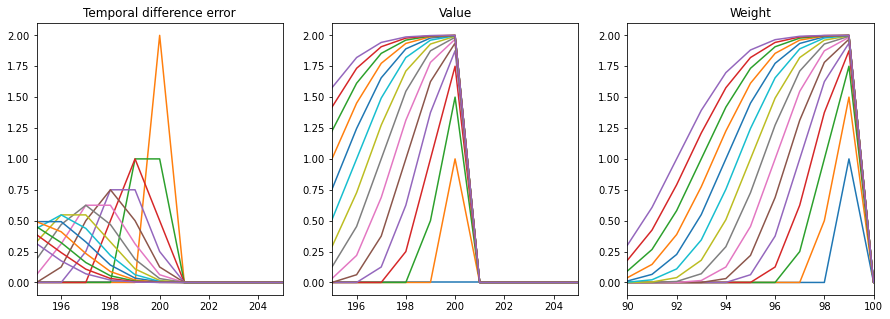

In [3]:
plt.figure(figsize=(15,5))
ax=plt.subplot(1,3,1)
plt.plot(tds[0:15,:].T)
plt.xlim((195,205))
ax.title.set_text('Temporal difference error')

ax=plt.subplot(1,3,2)
plt.plot(vs[0:15,:].T)
plt.xlim((195,205))
ax.title.set_text('Value')

ax=plt.subplot(1,3,3)
plt.plot(ws[0:15,:].T)
plt.xlim((90,100))
ax.title.set_text('Weight')



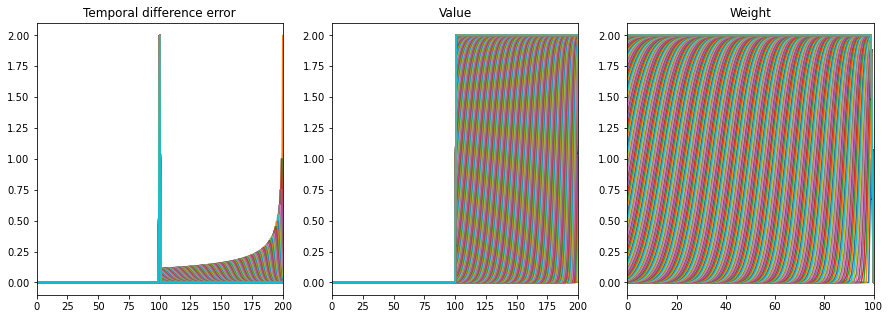

In [4]:
plt.figure(figsize=(15,5))
ax=plt.subplot(1,3,1)
plt.plot(tds[:,:].T)
plt.xlim((0,200))
ax.title.set_text('Temporal difference error')

ax=plt.subplot(1,3,2)
plt.plot(vs[:,:].T)
plt.xlim((0,200))
ax.title.set_text('Value')

ax=plt.subplot(1,3,3)
plt.plot(ws[:,:].T)
plt.xlim((0,100))
ax.title.set_text('Weight')

Next, predict how the same graphs look like for the last 20 trials. Then, modify the code to make the figures for the last 20 trials.

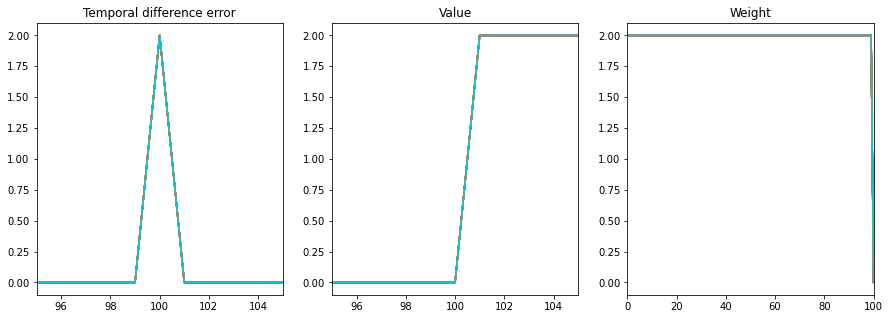

In [9]:
plt.figure(figsize=(15,5))
ax=plt.subplot(1,3,1)
plt.plot(tds[-20:,:].T)
plt.xlim((95,105))
ax.title.set_text('Temporal difference error')

ax=plt.subplot(1,3,2)
plt.plot(vs[-20:,:].T)
plt.xlim((95,105))
ax.title.set_text('Value')

ax=plt.subplot(1,3,3)
plt.plot(ws[-20:,:].T)
plt.xlim((0,100))
ax.title.set_text('Weight')

The code in the next cell makes a 3D plot of the value function as a function of time step and trial. Run the code and then make similar plots for the temporal difference error and the weights. Try to understand how temporal difference learning generates these results.

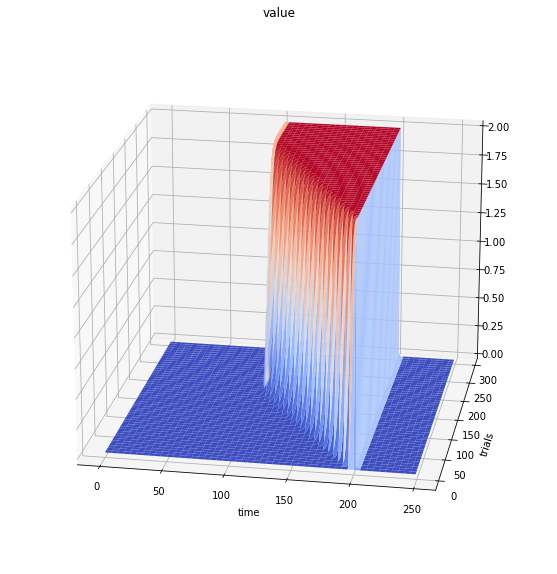

In [6]:
# value function
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x=np.arange(250)
y=np.arange(300)
X, Y = np.meshgrid(x, y)
ax.plot_surface(X,Y, vs,cmap='coolwarm')
ax.set_xlabel('time')
ax.set_ylabel('trials')
ax.set_title('value')
ax.view_init(20, -80)

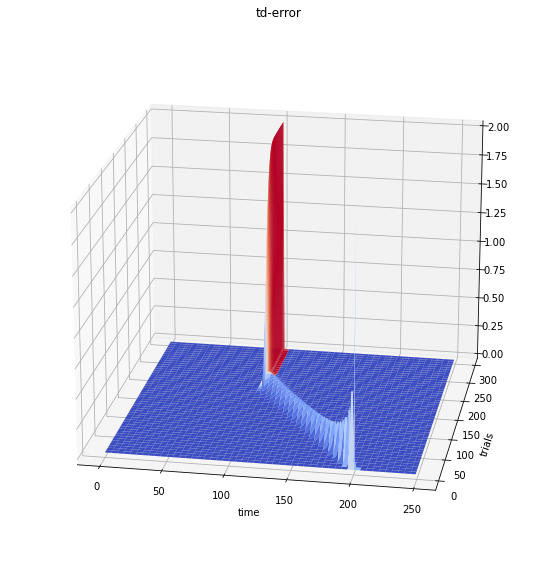

In [7]:
# td-error
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x=np.arange(250)
y=np.arange(300)
X, Y = np.meshgrid(x, y)
ax.plot_surface(X,Y, tds,cmap='coolwarm')
ax.set_xlabel('time')
ax.set_ylabel('trials')
ax.set_title('td-error')
ax.view_init(20, -80)

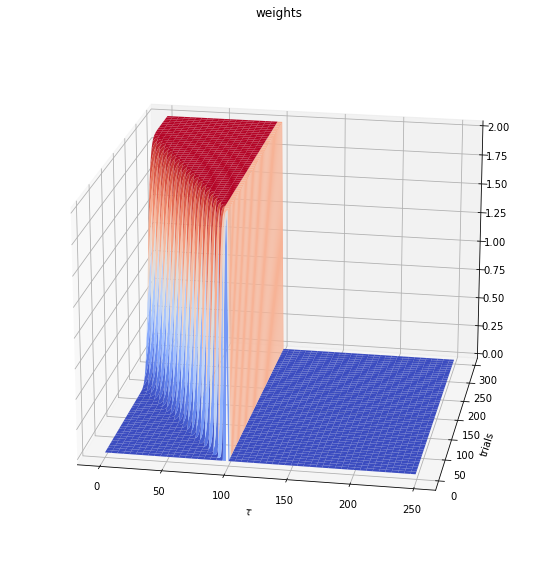

In [8]:
# weights
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x=np.arange(250)
y=np.arange(300)
X, Y = np.meshgrid(x, y)
ax.plot_surface(X,Y, ws,cmap='coolwarm')
ax.set_xlabel('$\\tau$')
ax.set_ylabel('trials')
ax.set_title('weights')
ax.view_init(20, -80)

# Exercise RL2.3: Markov decision process (MDP)

MDPs were introduced in the lectures.
- Could you think of a real life task that can be formulated as an MDP? Please specify what the states, rewards and actions would be for that task.
- What are the limits of MDPs? Could you think of situations that cannot be described in this framework?

Markovian
- chess without strategy
- navigation: state -> current location, reward --> reaching a goal, action -> going to next location

Limits
-  if you need memory

Non-Markovian
- e.g., delayed reward based on actions that are multiple time steps away